In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import glob

In [2]:
def conv_to_min():
    df_tmp = df.groupby('time').sum().reset_index()
    df_tmp['NOx_cumsum'] = df_tmp['NOx'].cumsum()
    df_min = df_tmp[0:len(df_tmp):60]
    df_min.to_parquet("Lyngby_long/processed/cars/baseline_min.parquet")

In [5]:
df = pd.read_parquet("Lyngby_long/processed/cars/baseline.parquet")

In [14]:
df = pd.read_parquet("Lyngby_long/processed/cars/baseline.parquet")
df_tmp = df.groupby('time').sum().reset_index()
df_tmp['NOx_cumsum'] = df_tmp['NOx'].cumsum()

In [40]:
df_tmp['time_mins'] = df_tmp['time']/60

In [41]:
df_tmp

time    NOx  electricity          x          y  NOx_cumsum  \
0          0   0.12         0.00    4108.42    5480.94        0.12   
1          1   0.20         0.00    4106.81    5479.31        0.32   
2          2   0.29         0.00    4612.71    6294.71        0.61   
3          3   0.37         0.00    4621.39    6290.22        0.98   
4          4   0.45         0.00    5056.99    6948.17        1.43   
...      ...    ...          ...        ...        ...         ...   
86395  86395  14.46        51.07  299729.80  340568.69   996595.83   
86396  86396  12.38        53.11  299207.28  339032.09   996608.21   
86397  86397  14.14       -24.77  299399.56  339077.37   996622.35   
86398  86398  13.20       -48.85  302554.36  340612.88   996635.55   
86399  86399  12.25         3.43  300101.44  337782.57   996647.80   

         time_mins  
0         0.000000  
1         0.016667  
2         0.033333  
3         0.050000  
4         0.066667  
...            ...  
86395  1439.916667  
86396  1439.933333  
86397  1439.950000  
86398  1439.966667  
86399  1439.983333  

[86400 rows x 7 columns]

In [42]:
tot_mins = 30

df_min_tmp = df_tmp[0:tot_mins*60]

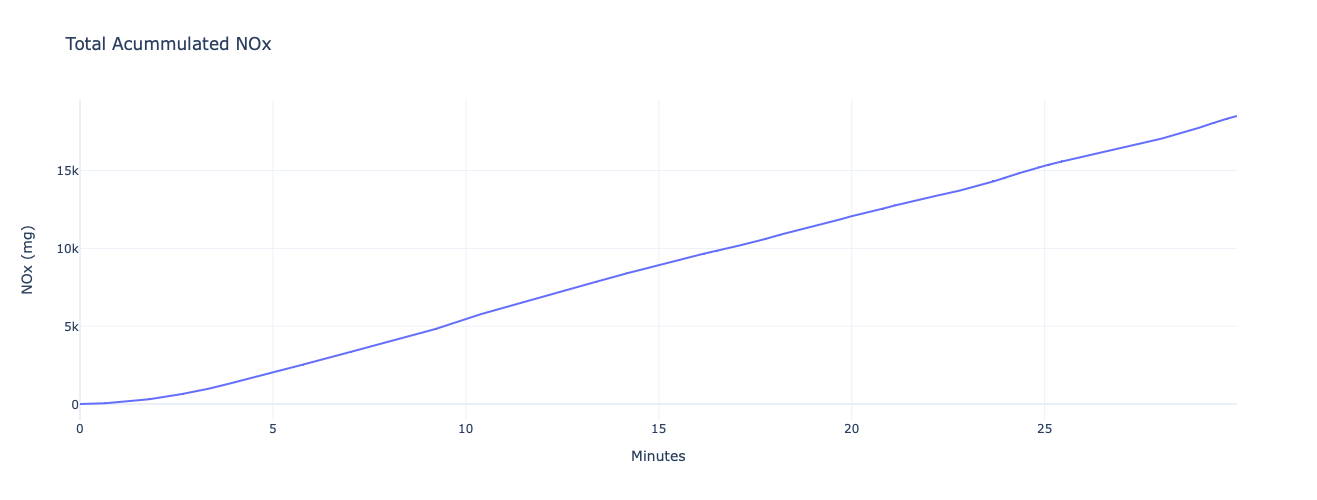

In [44]:
fig = go.Figure()
fig.add_trace(go.Line(x=df_min_tmp['time_mins'], y=df_min_tmp['NOx_cumsum'], name="NOx"))
fig.update_layout(title="Total Acummulated NOx", template="plotly_white", width=800, height=500)
fig.update_xaxes(title_text="Minutes")
fig.update_yaxes(title_text="NOx (mg)")
fig.show()

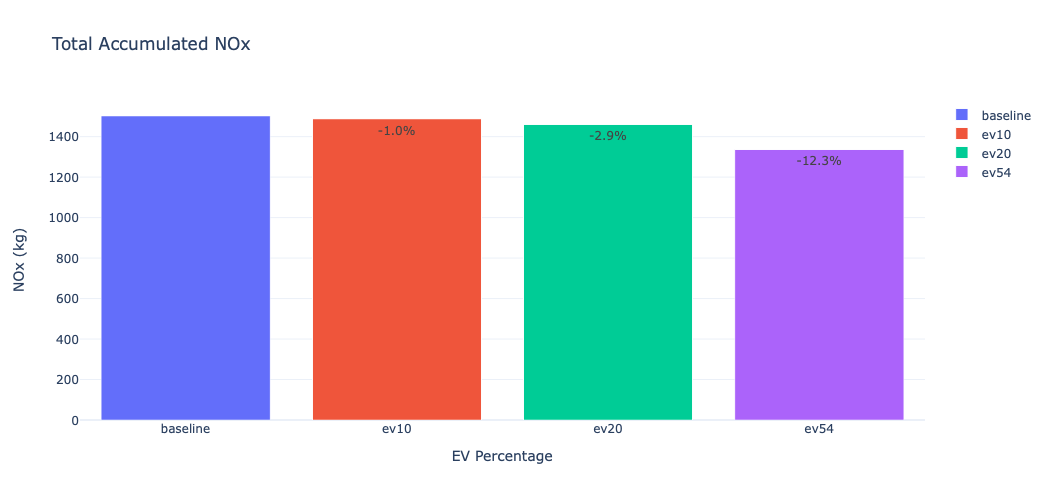

In [32]:
percentages = ["0","-1.0%", "-2.9%", "-12.3%"]

fig = go.Figure()
for idx, col in enumerate(["baseline", "ev10", "ev20", "ev54"]):
    if idx != 0:
        fig.add_trace(go.Bar(x=[col], y=[df_hist[col].sum()/1000], name=col,text=percentages[idx]))
    else:
        fig.add_trace(go.Bar(x=[col], y=[df_hist[col].sum()/1000], name=col))
fig.update_layout(template="plotly_white", title="Total Accumulated NOx", width=500, height=500)
fig.update_xaxes(title_text="EV Percentage")
fig.update_yaxes(title_text="NOx (kg)")
fig.write_image("plots/cars/Total_Accumulated_NOx_bar.png")
fig.show()

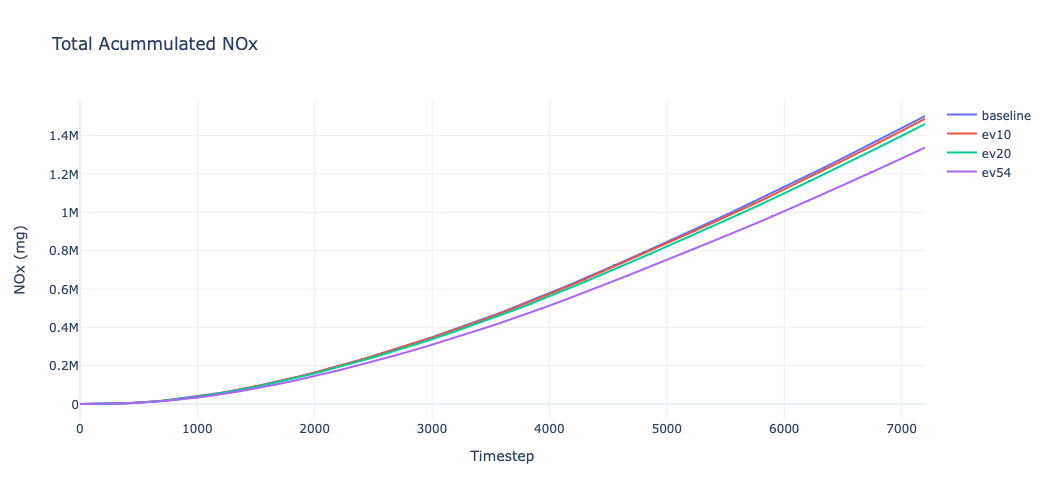

In [35]:
fig = go.Figure()
for col in ["baseline", "ev10", "ev20", "ev54"]:
    fig.add_trace(go.Line(x=df_hist['time'], y=df_hist[col].cumsum(), name=col))
fig.update_layout(title="Total Acummulated NOx", template="plotly_white", width=800, height=500)
fig.update_xaxes(title_text="Timestep")
fig.update_yaxes(title_text="NOx (mg)")
fig.write_image("plots/trucks/Total_Accumulated_NOx_line.png")
fig.show()

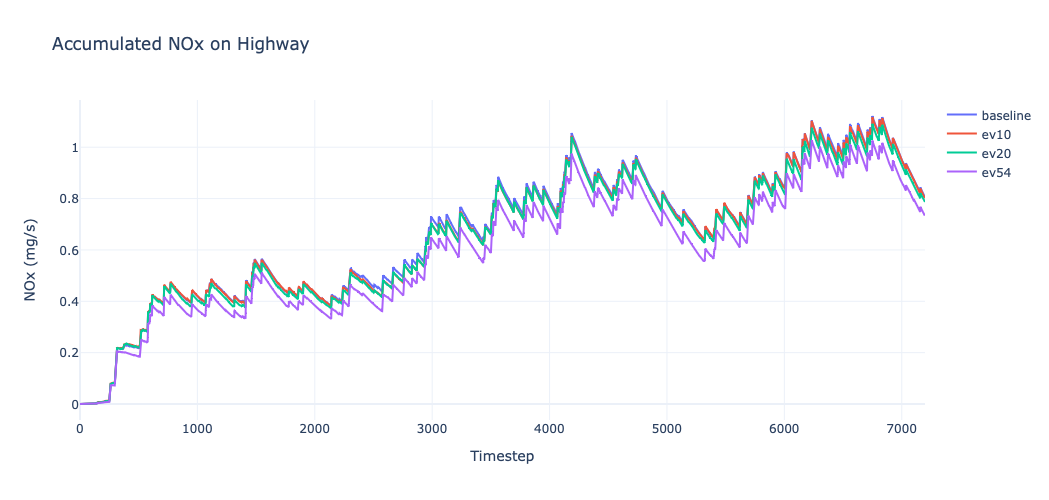

In [20]:
fig = go.Figure()
for col in ["baseline", "ev10", "ev20", "ev54"]:
    fig.add_trace(go.Line(x=df_samp['time'], y=df_samp[col], name=col))
    
fig.update_layout(title="Accumulated NOx on Highway", template="plotly_white", width=800, height=500)
fig.update_xaxes(title_text="Timestep")
fig.update_yaxes(title_text="NOx (mg/s)")
fig.write_image("plots/cars/Accumulated_NOx_highway.png")
fig.show()

# Trucks

In [21]:
df_hist, df_samp = load_files("trucks", wind=True)

/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




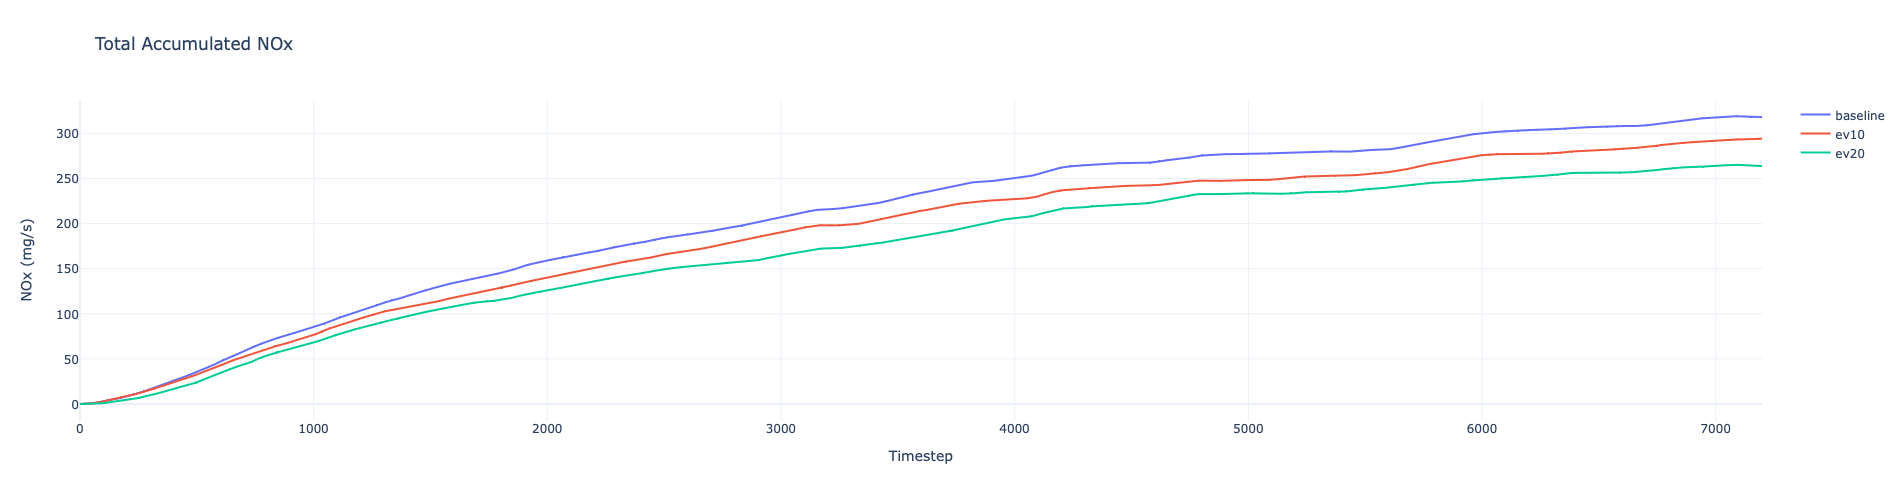

In [22]:
fig = go.Figure()
for col in ["baseline", "ev10", "ev20"]:
    fig.add_trace(go.Line(x=df_hist['time'], y=df_hist[col], name=col))
fig.update_layout(title="Total Accumulated NOx", template="plotly_white", width=800, height=500)
fig.update_xaxes(title_text="Timestep")
fig.update_yaxes(title_text="NOx (mg/s)")
fig.write_image("plots/trucks/Total_Accumulated_NOx_line.png")
fig.show()

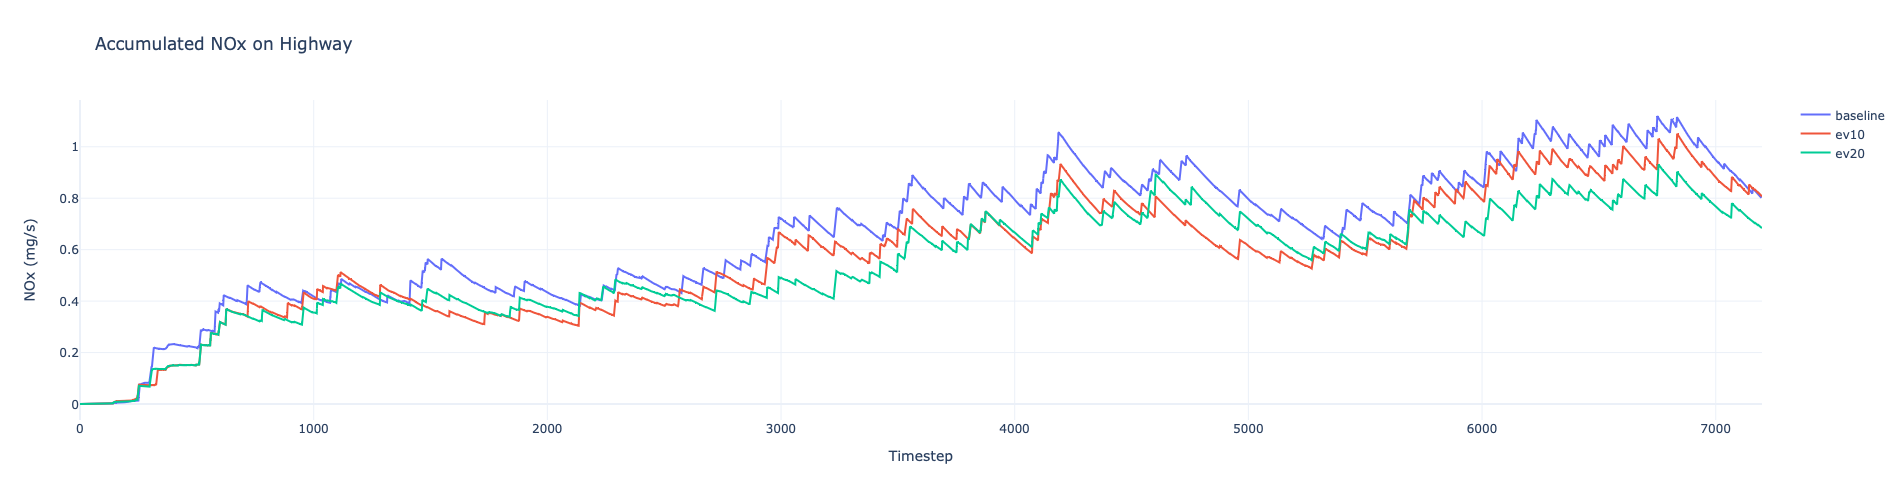

In [23]:
fig = go.Figure()
for col in ["baseline", "ev10", "ev20"]:
    fig.add_trace(go.Line(x=df_samp['time'], y=df_samp[col], name=col))
fig.update_layout(title="Accumulated NOx on Highway", template="plotly_white", width=800, height=500)
fig.update_xaxes(title_text="Timestep")
fig.update_yaxes(title_text="NOx (mg/s)")
fig.write_image("plots/trucks/Accumulated_NOx_highway.png")
fig.show()

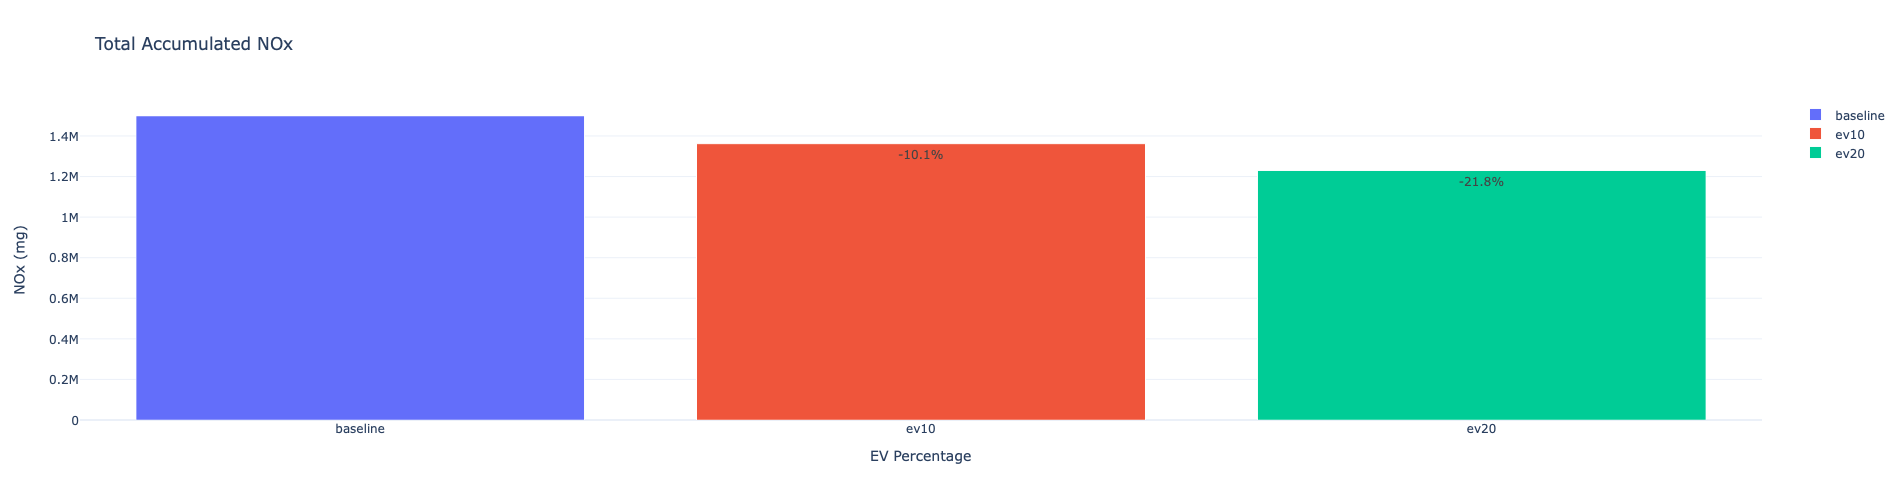

In [25]:
percentages = ["0","-10.1%", "-21.8%"]

fig = go.Figure()
for idx, col in enumerate(["baseline", "ev10", "ev20"]):
    if idx != 0:
        fig.add_trace(go.Bar(x=[col], y=[df_hist[col].sum()], name=col,text=percentages[idx]))
    else:
        fig.add_trace(go.Bar(x=[col], y=[df_hist[col].sum()], name=col))
fig.update_layout(title="Total Accumulated NOx",template="plotly_white", width=500, height=500)
fig.update_xaxes(title_text="EV Percentage")
fig.update_yaxes(title_text="NOx (mg)")
fig.write_image("plots/trucks/Total_Accumulated_NOx_bar.png")
fig.show()